In [6]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [7]:
#IMPORT DATA
#DATA UNDERSTANDING

In [8]:
#READ THE DATASET
dataTrain=pd.read_csv('Plane_Price.csv')

dataTrain.head()

,Model_Name,Engine_Type,HP_or_lbs_threa_engine,MaxspeedKnots,Rcmnd_cruise_Knots,Stall_Knots_dirty,Fuel_gal_lbs,All_eng_rate_of_climb,Eng_out_rate_of_climb,Takeoff_over_50ft,Landing_over_50ft,Empty_weight_lbs,Length_ft_in,Wing_span_ft_in,Range_NM,Price
0,100 Darter (S.L. Industries),Piston,145,104.0,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89.0,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90.0,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88.0,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83.0,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [9]:
#DISPLAY THE NUMBER OF ROWS AND COLUMNS
dataTrain.shape

(517, 16)

In [10]:
dataTrain.columns #to know the column names

Index(['Model_Name', 'Engine_Type', 'HP_or_lbs_threa_engine', 'MaxspeedKnots',
       'Rcmnd_cruise_Knots', 'Stall_Knots_dirty', 'Fuel_gal_lbs',
       'All_eng_rate_of_climb', 'Eng_out_rate_of_climb', 'Takeoff_over_50ft',
       'Landing_over_50ft', 'Empty_weight_lbs', 'Length_ft_in',
       'Wing_span_ft_in', 'Range_NM', 'Price'],
      dtype='object')

In [11]:
dataTrain['Model_Name'].unique() ##to know the unique models names

array(['100 Darter (S.L. Industries)', '7 CCM Champ', '7 AC Champ',
       'PA-60-700P Aerostar (preliminary)',
       "PA-601P pressurized Aerostar ('77 service ceiling=26,350)",
       'PA-601, 601A, turbochg Aerostar',
       'G164B-600 AG-CAT (design category) sprayer', 'G164A-300 AG CAT',
       'G164A-245 AG CAT', 'A-2', '415-G', 'CH-601-XL/i/650-LS/i',
       '8KCAB-150 F/P prop(w/optional speed kit)', '7KCAB', '7GCAA',
       '7GCBC with EDO floats', '7EC',
       'Starship 2000 (2000A=increased spds & weights)', 'King Air 260',
       'B200 Super King Air',
       "B100 King Air (prior '79 serv. ceiling=29,100)", '100 King Air',
       'F90 King Air',
       'C90A King Air (LJ-1063 up) (10,100 g/w=SN1138 up)',
       'A 90 King Air', '88 Queen Air pressurized',
       'B 80 Queen Air - specs thru 1972', '80 Queen Air',
       'A 65 Queen Air', "B 60 Duke pressurized (prior '78 t/o run=2006)",
       '60 Duke Pressurized', 'C 50 Twin Bonanza', '50 Twin Bonanza',
       "58 P Ba

In [12]:
dataTrain['Model_Name'].value_counts() #to know the count of each models names

100 Darter (S.L. Industries)                        234
GII (G1159) with tip tanks                            1
1121 Jet Commander                                    1
1123 Commodore Jet                                    1
1124A Westwind 2                                      1
                                                   ... 
T 210 F Turbo Centurion                               1
210 M,NII (prior'78=less svc. ceil. & r/o/c=860)      1
210 F Centurion                                       1
T 207 (Stationair 7 & 8) '77=eng 310 hp               1
2150A Kachina                                         1
Name: Model_Name, Length: 273, dtype: int64

In [13]:
#CHECKING AND DISPLAYING THE NULL VALUES IN EACH COLUMN
dataTrain.isnull().sum()

Model_Name                11
Engine_Type                0
HP_or_lbs_threa_engine     0
MaxspeedKnots             20
Rcmnd_cruise_Knots        10
Stall_Knots_dirty         15
Fuel_gal_lbs               0
All_eng_rate_of_climb      4
Eng_out_rate_of_climb     26
Takeoff_over_50ft         25
Landing_over_50ft          1
Empty_weight_lbs           1
Length_ft_in               2
Wing_span_ft_in            2
Range_NM                  18
Price                     10
dtype: int64

In [14]:
#REMOVING ROWS WITH NULL VALUES
dataTrain=dataTrain.dropna()

In [15]:
#CHECKING IF NULL VALUES ARE ELIMINATED
dataTrain.isnull().sum()

Model_Name                0
Engine_Type               0
HP_or_lbs_threa_engine    0
MaxspeedKnots             0
Rcmnd_cruise_Knots        0
Stall_Knots_dirty         0
Fuel_gal_lbs              0
All_eng_rate_of_climb     0
Eng_out_rate_of_climb     0
Takeoff_over_50ft         0
Landing_over_50ft         0
Empty_weight_lbs          0
Length_ft_in              0
Wing_span_ft_in           0
Range_NM                  0
Price                     0
dtype: int64

In [16]:
dataTrain.shape

(411, 16)

In [17]:
dataTrain.dtypes

Model_Name                 object
Engine_Type                object
HP_or_lbs_threa_engine     object
MaxspeedKnots             float64
Rcmnd_cruise_Knots        float64
Stall_Knots_dirty         float64
Fuel_gal_lbs                int64
All_eng_rate_of_climb      object
Eng_out_rate_of_climb     float64
Takeoff_over_50ft         float64
Landing_over_50ft          object
Empty_weight_lbs           object
Length_ft_in               object
Wing_span_ft_in            object
Range_NM                   object
Price                     float64
dtype: object

In [18]:
# List of columns to convert to float
columns_to_convert = [
    'HP_or_lbs_threa_engine',
    'All_eng_rate_of_climb',
    'Landing_over_50ft',
    'Empty_weight_lbs',
    'Range_NM'
]

# Convert the specified columns to float
for column in columns_to_convert:
    dataTrain[column] = pd.to_numeric(dataTrain[column], errors='coerce')

# Verify the conversion
print(dataTrain.dtypes)

# Optional: Handle missing values
dataTrain.fillna(0, inplace=True)  # Replace NaN with 0 if necessary


Model_Name                 object
Engine_Type                object
HP_or_lbs_threa_engine    float64
MaxspeedKnots             float64
Rcmnd_cruise_Knots        float64
Stall_Knots_dirty         float64
Fuel_gal_lbs                int64
All_eng_rate_of_climb     float64
Eng_out_rate_of_climb     float64
Takeoff_over_50ft         float64
Landing_over_50ft         float64
Empty_weight_lbs          float64
Length_ft_in               object
Wing_span_ft_in            object
Range_NM                  float64
Price                     float64
dtype: object


In [19]:
#EXPLORATORY DATA ANALYSIS (EDA)
#CHECKING THE CORRELATION BETWEEN THE NUMERICAL FEATURES

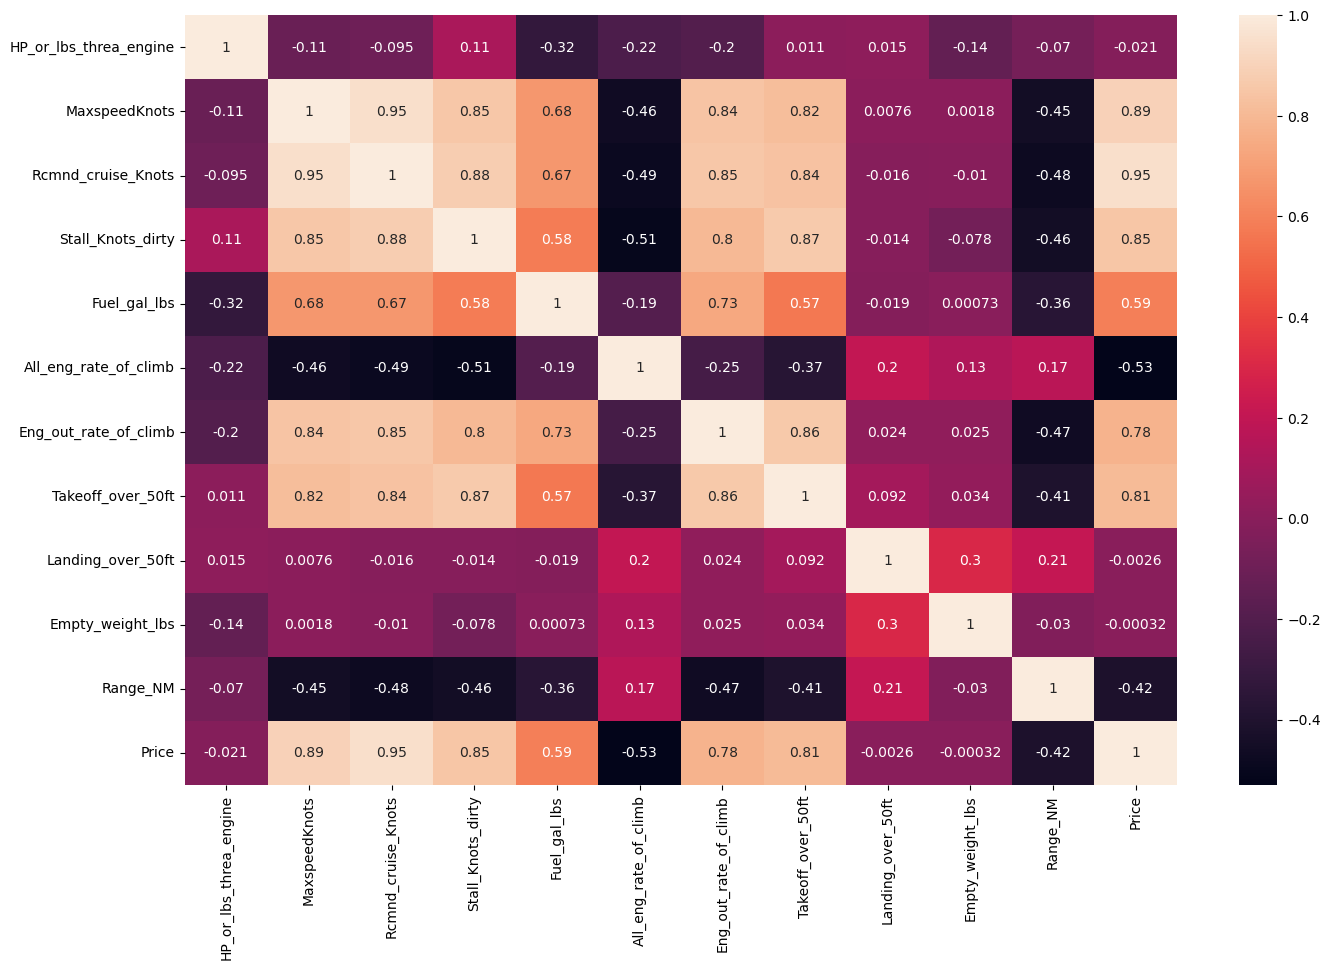

In [20]:
#HEAT MAP
plt.figure(figsize=(16,10))
numerical_features = dataTrain.select_dtypes(include=['number']).columns
corr = dataTrain[numerical_features].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
#REGRESSION PLOT TO CHECK THE CORRELATION BETWEEN THE NUMERICAL FEATURES
#AND THE TARGET

<AxesSubplot:xlabel='HP_or_lbs_threa_engine', ylabel='Price'>

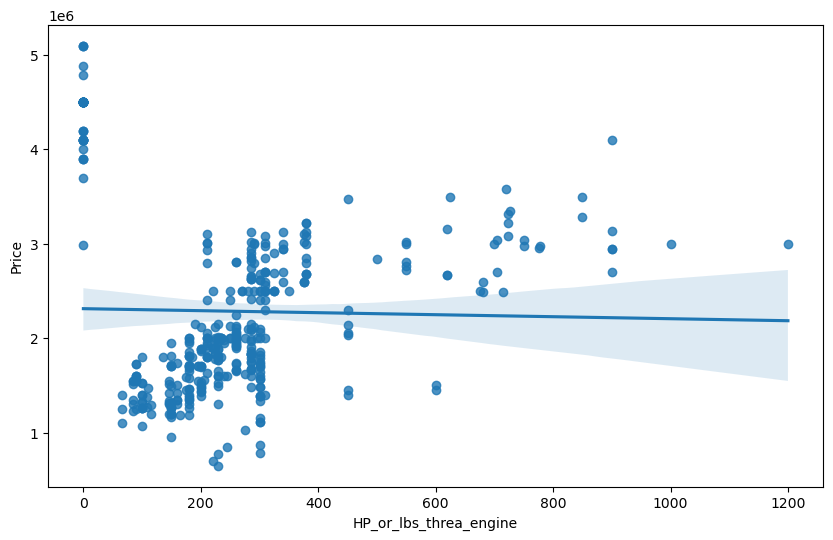

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x="HP_or_lbs_threa_engine", y="Price", data=dataTrain)

In [23]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['HP_or_lbs_threa_engine'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.020674310781034346  with a P-value of P = 0.6760193267598483


<AxesSubplot:xlabel='Rcmnd_cruise_Knots', ylabel='Price'>

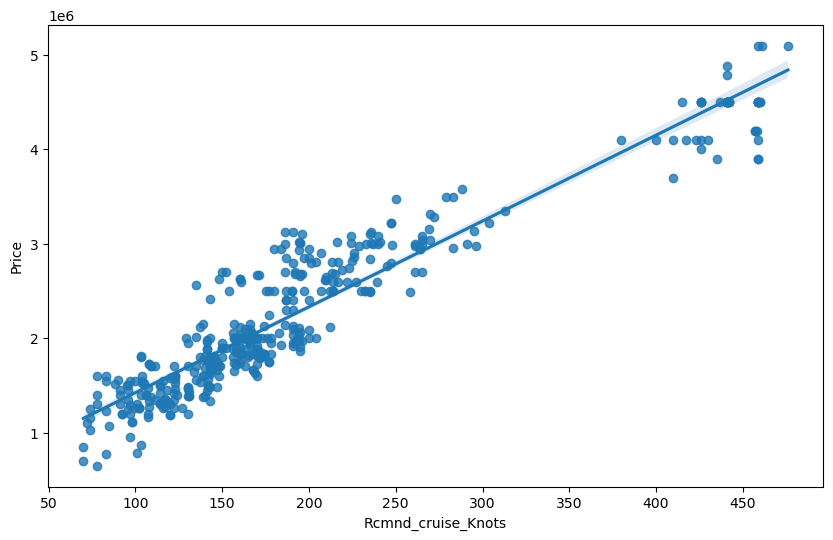

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x="Rcmnd_cruise_Knots", y="Price", data=dataTrain)

In [25]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Rcmnd_cruise_Knots'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9478413437941688  with a P-value of P = 3.356699624169581e-205


<AxesSubplot:xlabel='MaxspeedKnots', ylabel='Price'>

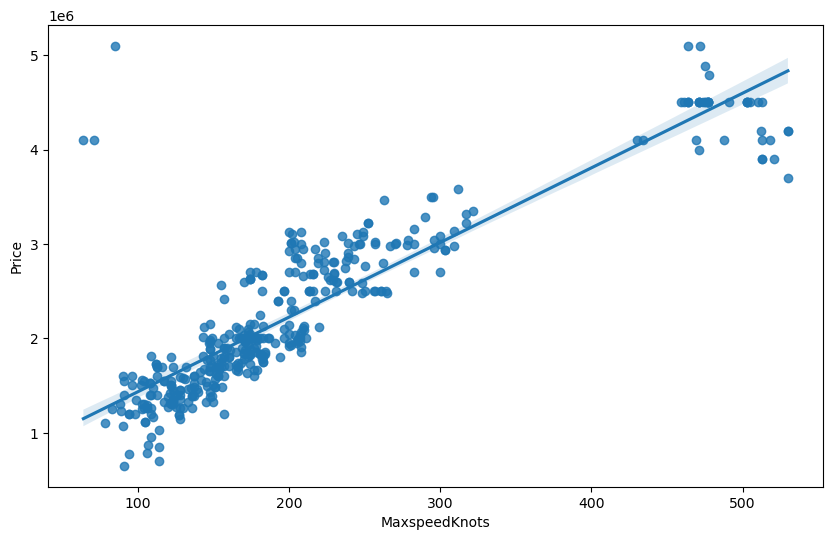

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x="MaxspeedKnots", y="Price", data=dataTrain)

In [27]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['MaxspeedKnots'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8946315395851607  with a P-value of P = 3.483728285409333e-145


<AxesSubplot:xlabel='Stall_Knots_dirty', ylabel='Price'>

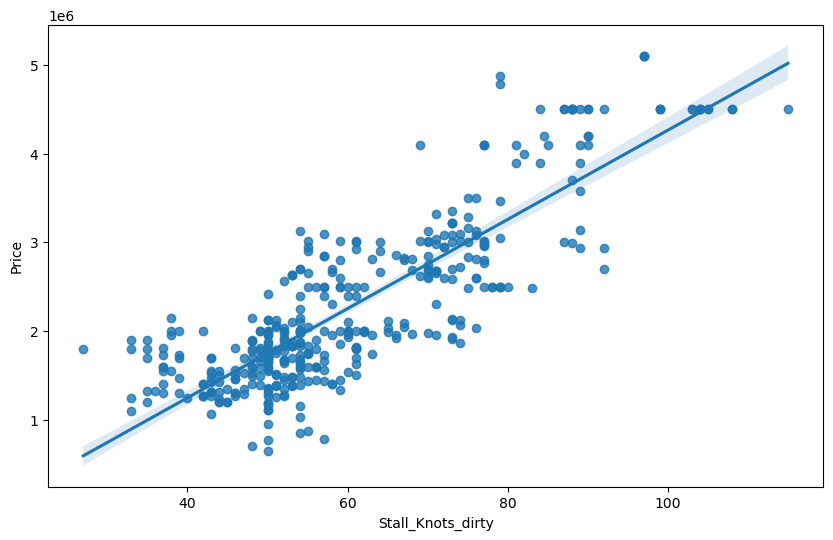

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x="Stall_Knots_dirty", y="Price", data=dataTrain)

In [29]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Stall_Knots_dirty'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8490147843045817  with a P-value of P = 2.2278580718112033e-115


<AxesSubplot:xlabel='Eng_out_rate_of_climb', ylabel='Price'>

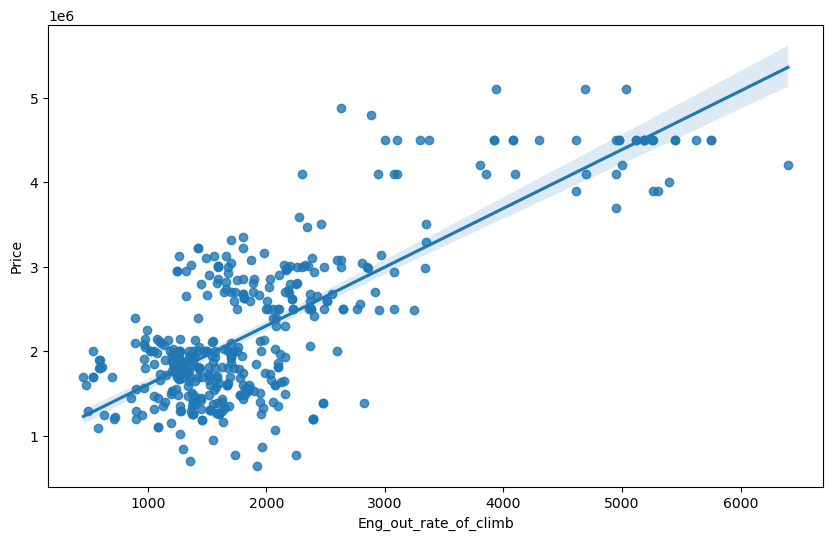

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x="Eng_out_rate_of_climb", y="Price", data=dataTrain)

In [31]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Eng_out_rate_of_climb'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7769418209334205  with a P-value of P = 3.2690135819091705e-84


<AxesSubplot:xlabel='Fuel_gal_lbs', ylabel='Price'>

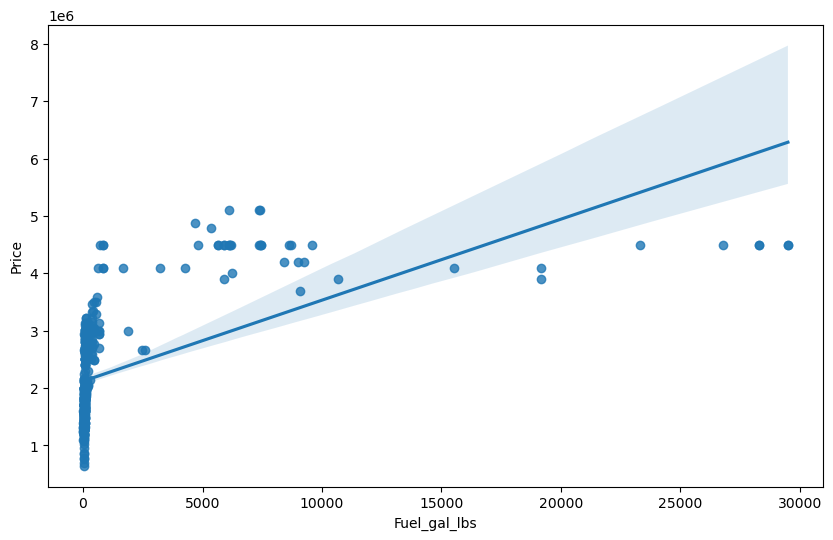

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x="Fuel_gal_lbs", y="Price", data=dataTrain)

In [33]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Fuel_gal_lbs'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5884440522070178  with a P-value of P = 1.1846765170400204e-39


<AxesSubplot:xlabel='Takeoff_over_50ft', ylabel='Price'>

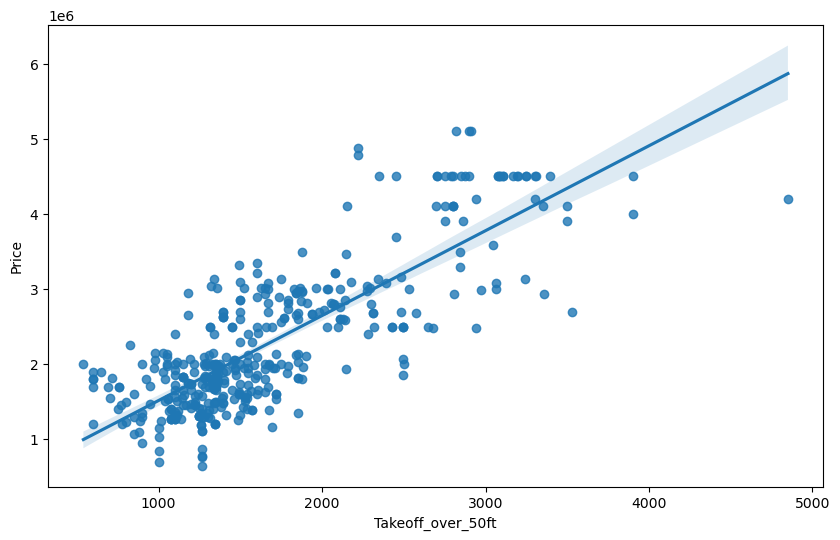

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x="Takeoff_over_50ft", y="Price", data=dataTrain)

In [35]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Takeoff_over_50ft'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8064101180753387  with a P-value of P = 2.3721303603683767e-95


<AxesSubplot:xlabel='All_eng_rate_of_climb', ylabel='Price'>

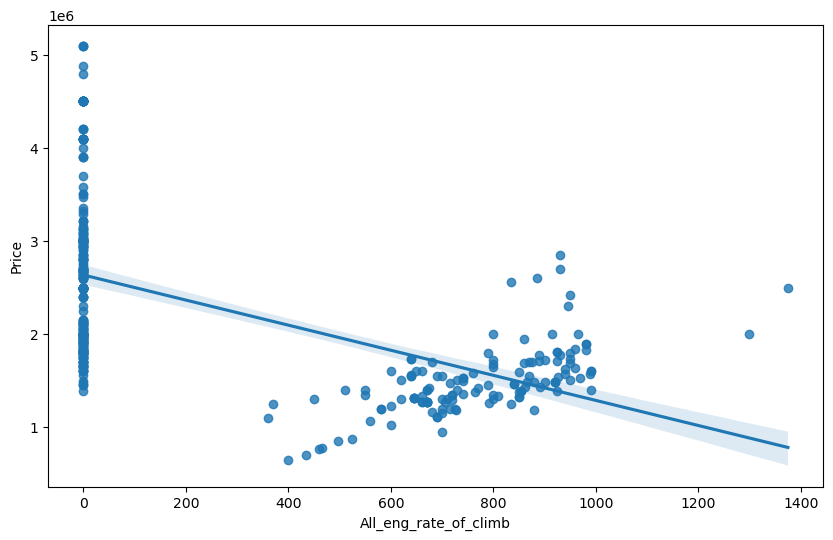

In [36]:
plt.figure(figsize=(10,6))
sns.regplot(x="All_eng_rate_of_climb", y="Price", data=dataTrain)

In [37]:
pearson_coef, p_value = stats.pearsonr(dataTrain['All_eng_rate_of_climb'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5303275755734526  with a P-value of P = 3.4602679273953283e-31


<AxesSubplot:xlabel='Landing_over_50ft', ylabel='Price'>

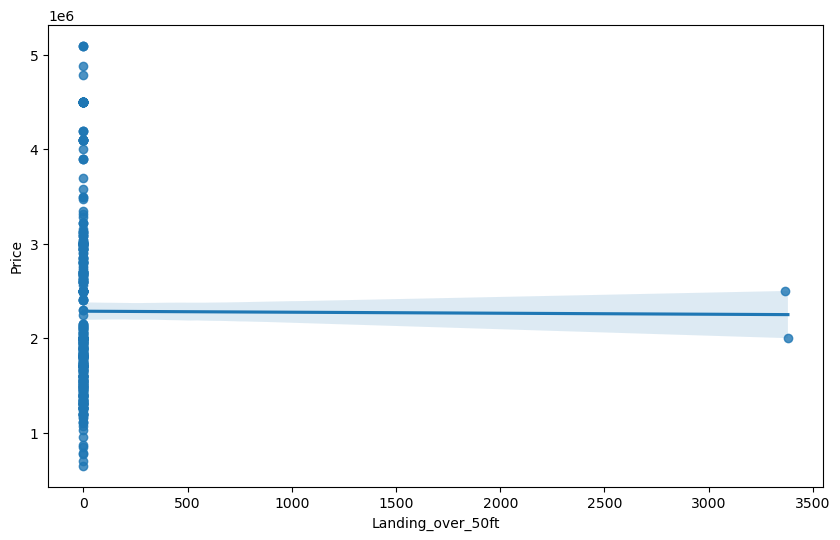

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(x="Landing_over_50ft", y="Price", data=dataTrain)

In [39]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Landing_over_50ft'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.00262129252529795  with a P-value of P = 0.9577477969058057


<AxesSubplot:xlabel='Empty_weight_lbs', ylabel='Price'>

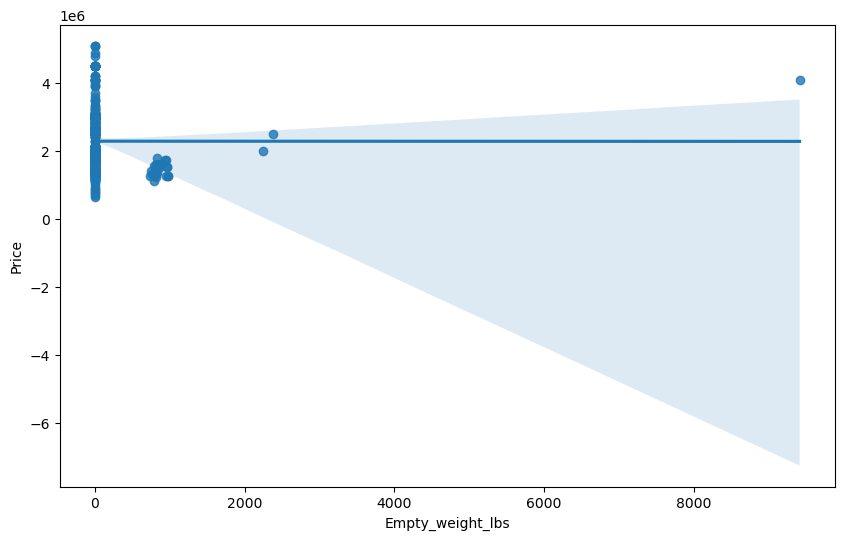

In [40]:
plt.figure(figsize=(10,6))
sns.regplot(x="Empty_weight_lbs", y="Price", data=dataTrain)

In [41]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Empty_weight_lbs'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.00032422328103794834  with a P-value of P = 0.9947714970892316


<AxesSubplot:xlabel='Range_NM', ylabel='Price'>

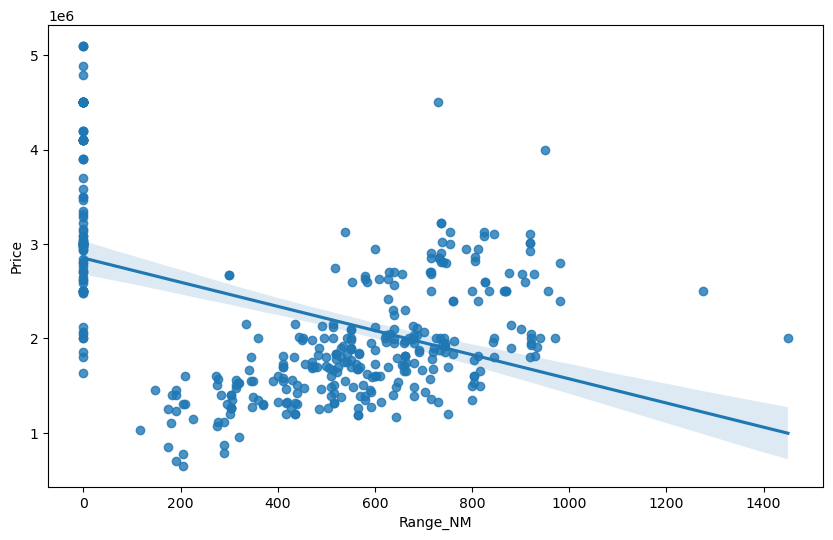

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x="Range_NM", y="Price", data=dataTrain)

In [43]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Range_NM'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.4162376737717586  with a P-value of P = 1.1862696023538154e-18


In [44]:
#BOX PLOT TO CHECK THE CORRELATION BETWEEN THE STRINGS FEATURES
#AND THE TARGET

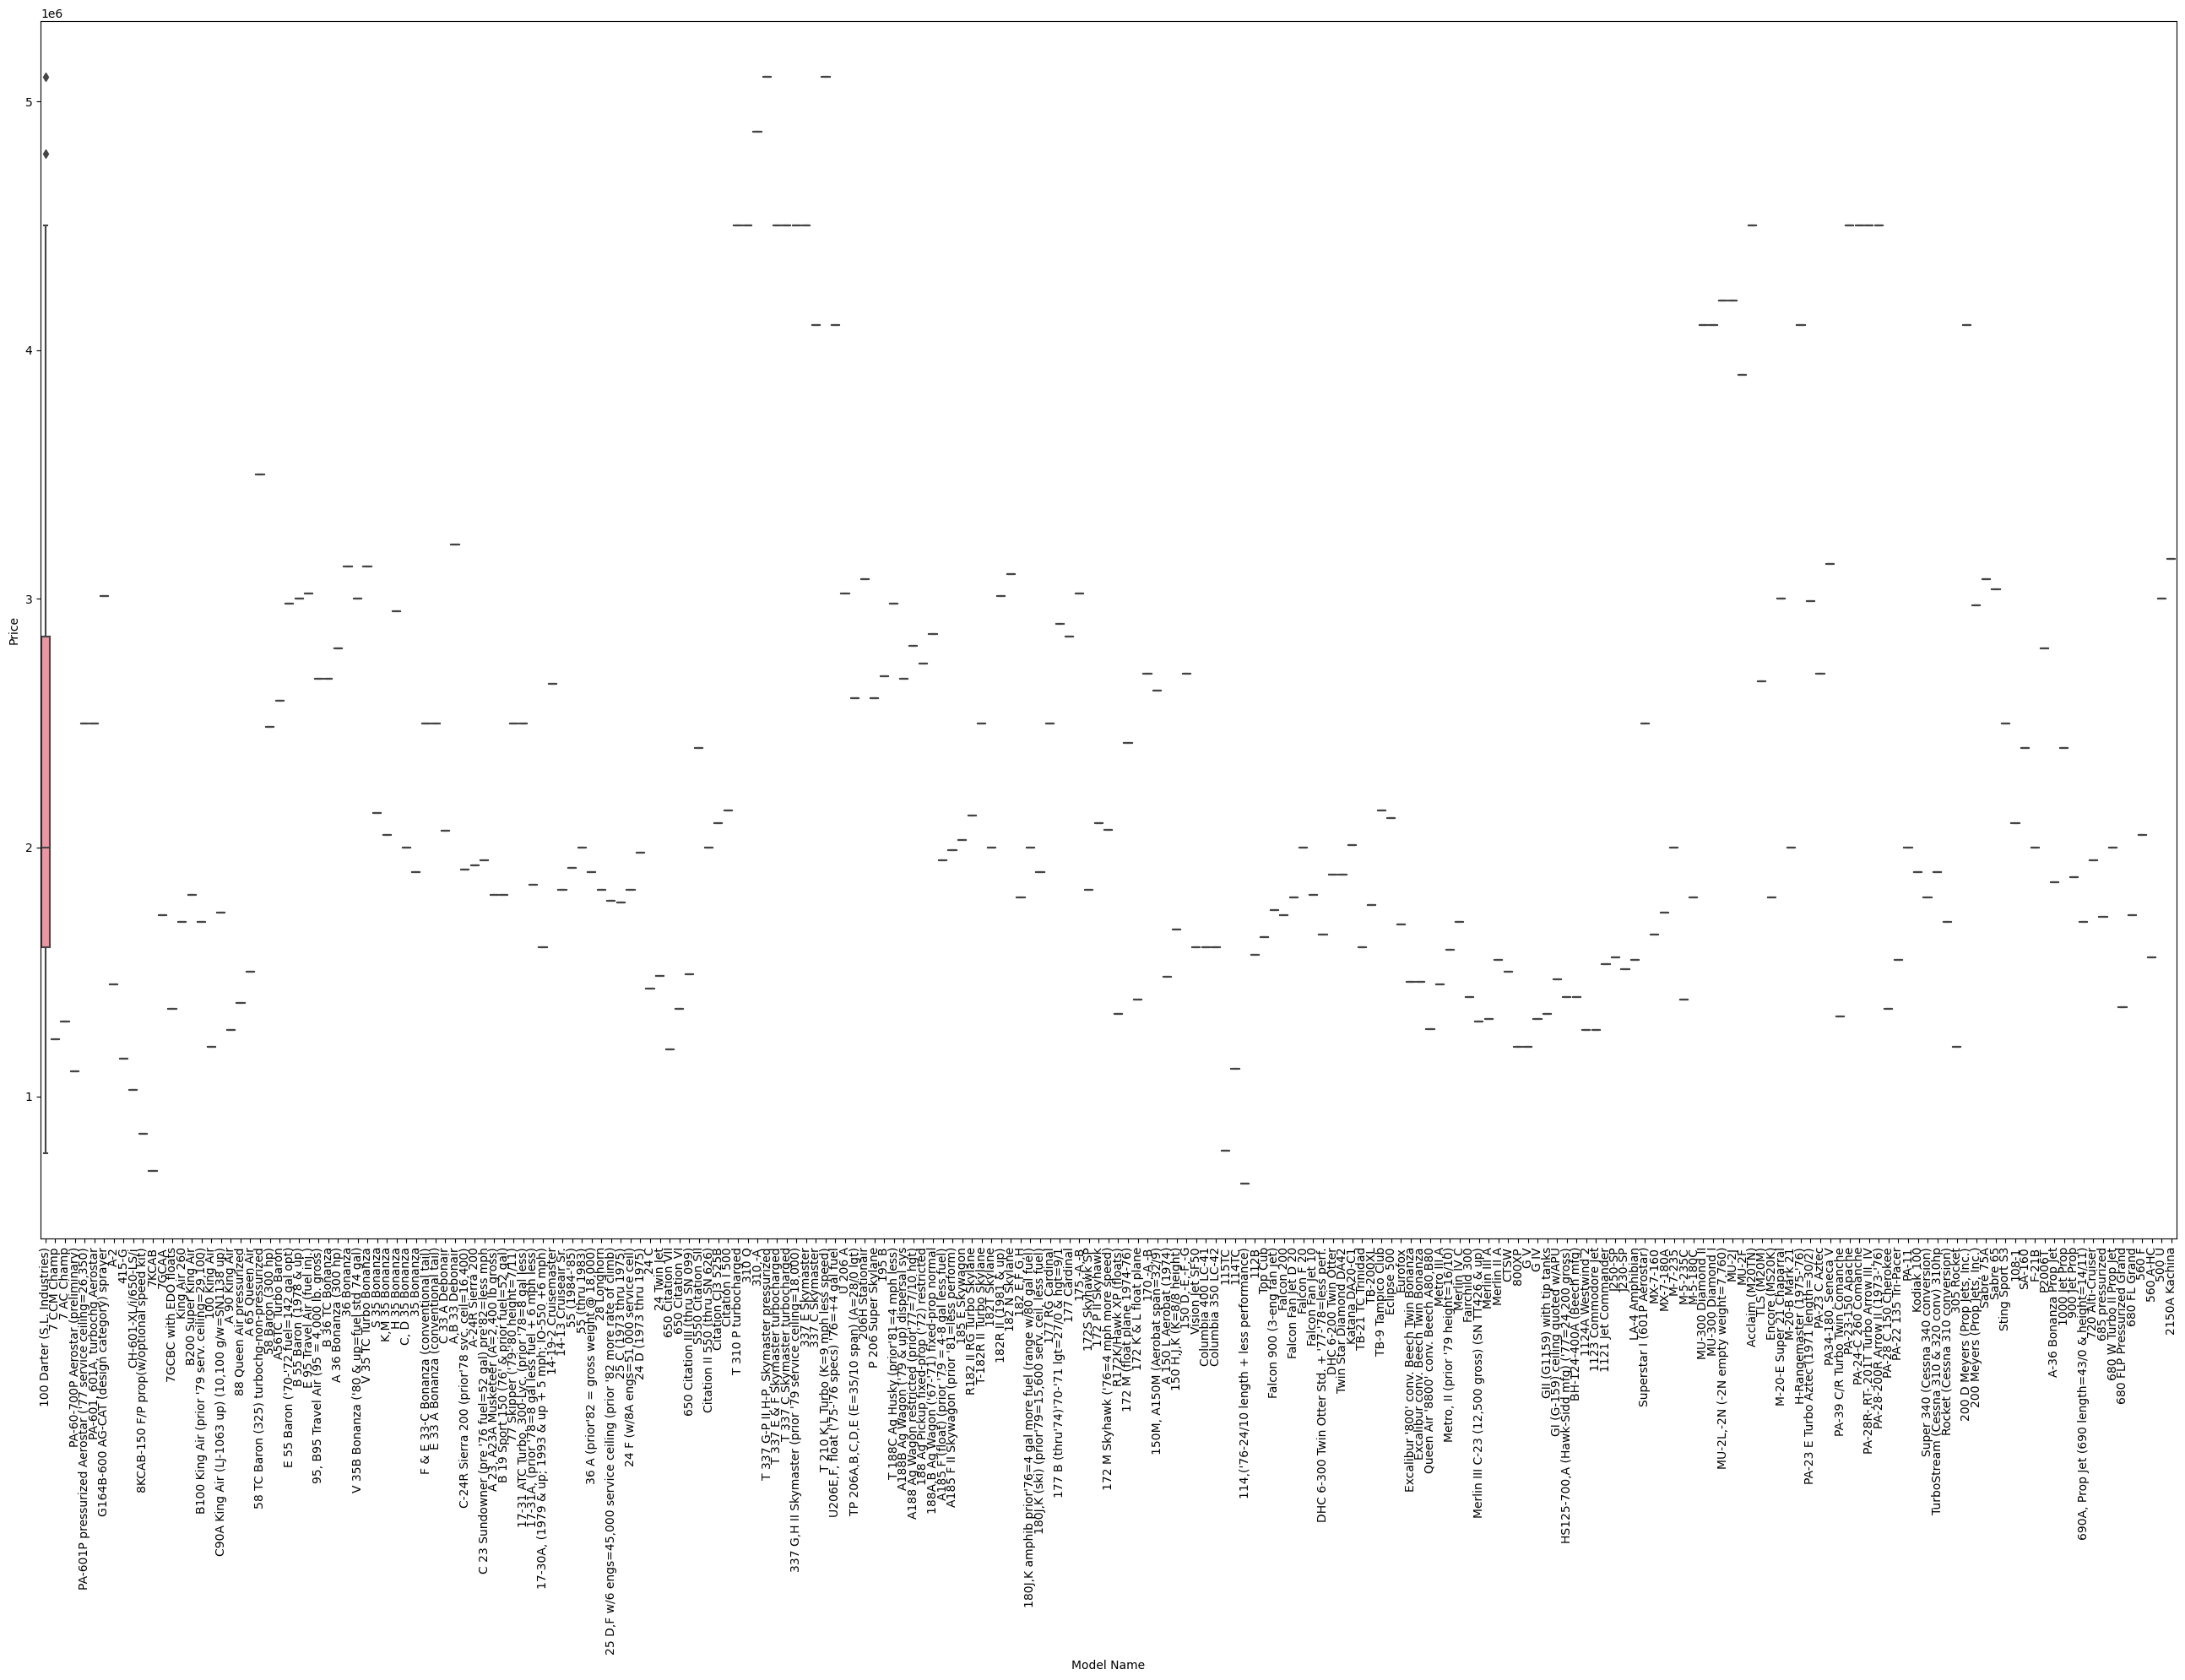

In [45]:
plt.figure(figsize=(26, 20))

# Creating the boxplot with rotated x-axis labels
sns.boxplot(x="Model_Name", y="Price", data=dataTrain)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel('Model Name')
plt.ylabel('Price')
plt.tight_layout()  # Ensure everything fits in the plot
plt.show()

<AxesSubplot:xlabel='Engine_Type', ylabel='Price'>

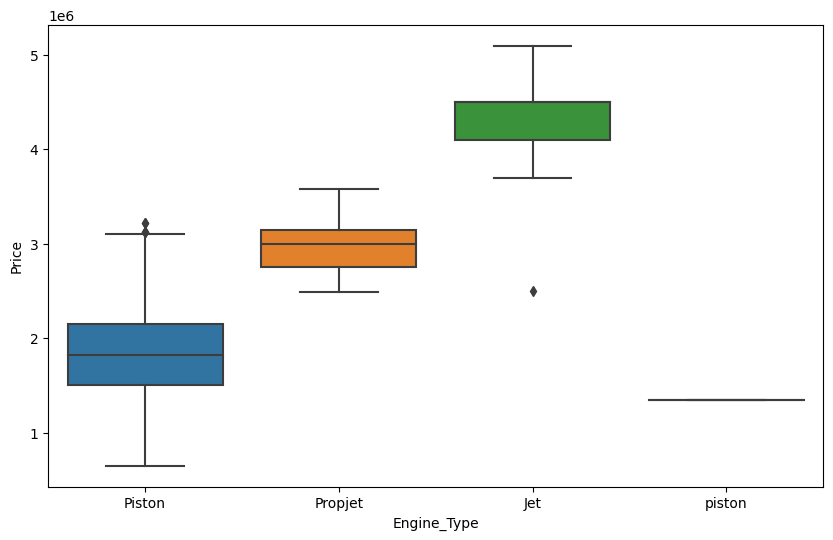

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Engine_Type", y="Price", data=dataTrain)

<AxesSubplot:xlabel='Length_ft_in', ylabel='Price'>

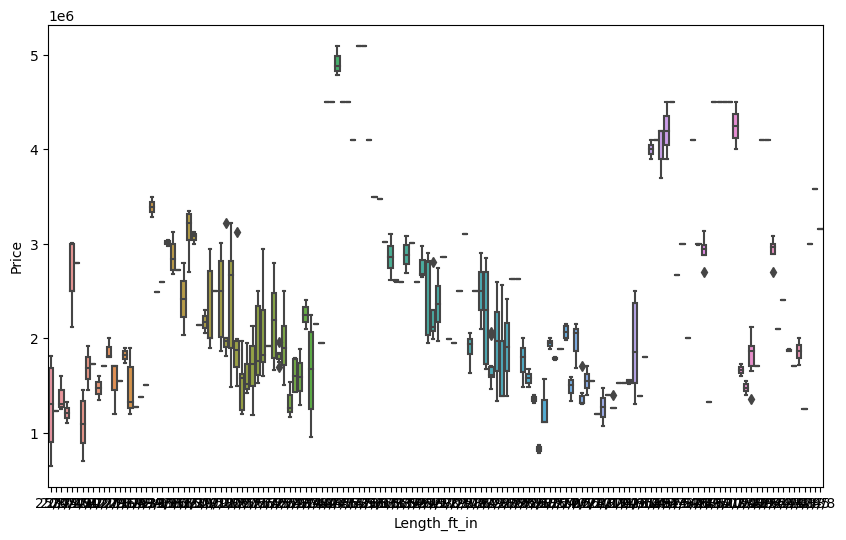

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Length_ft_in", y="Price", data=dataTrain)

<AxesSubplot:xlabel='Wing_span_ft_in', ylabel='Price'>

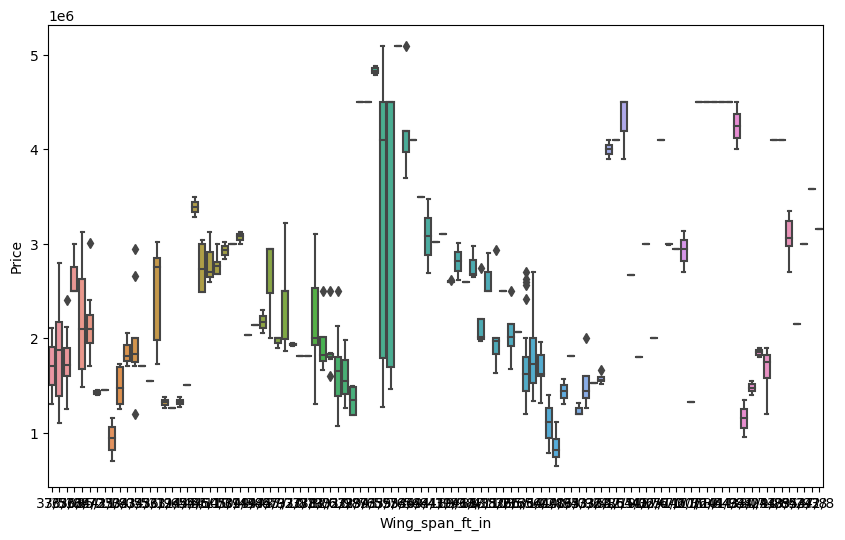

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Wing_span_ft_in", y="Price", data=dataTrain)

In [49]:
#DROPPING THE FEATURES THAT HAS NO IMPACT ON THE TARGET
dataTrain.drop(['Landing_over_50ft', 'Empty_weight_lbs', 'HP_or_lbs_threa_engine'], axis = 1, inplace = True, errors='ignore')

In [50]:
column_names = dataTrain.columns.tolist()
column_names

['Model_Name',
 'Engine_Type',
 'MaxspeedKnots',
 'Rcmnd_cruise_Knots',
 'Stall_Knots_dirty',
 'Fuel_gal_lbs',
 'All_eng_rate_of_climb',
 'Eng_out_rate_of_climb',
 'Takeoff_over_50ft',
 'Length_ft_in',
 'Wing_span_ft_in',
 'Range_NM',
 'Price']

In [51]:
feature_column_names = dataTrain.drop(['Price'], axis = 1).columns.tolist()
feature_column_names

['Model_Name',
 'Engine_Type',
 'MaxspeedKnots',
 'Rcmnd_cruise_Knots',
 'Stall_Knots_dirty',
 'Fuel_gal_lbs',
 'All_eng_rate_of_climb',
 'Eng_out_rate_of_climb',
 'Takeoff_over_50ft',
 'Length_ft_in',
 'Wing_span_ft_in',
 'Range_NM']

In [52]:
dataTrain.shape

(411, 13)

In [53]:
#A descriptive analysis to check incorrect entries and anormalies
dataTrain.describe()

,MaxspeedKnots,Rcmnd_cruise_Knots,Stall_Knots_dirty,Fuel_gal_lbs,All_eng_rate_of_climb,Eng_out_rate_of_climb,Takeoff_over_50ft,Range_NM,Price
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,4.110000e+02
mean,207.739659,194.878345,60.643552,1166.871046,259.321168,1976.418491,1680.109489,441.330900,2.285454e+06
std,108.467744,99.948083,16.184909,3998.401140,377.335413,1073.145256,683.923748,311.768688,9.588278e+05
min,64.000000,70.000000,27.000000,14.000000,0.000000,457.000000,540.000000,0.000000,6.500000e+05
25%,139.500000,131.000000,50.000000,50.000000,0.000000,1342.000000,1250.000000,58.500000,1.600000e+06
50%,176.000000,167.000000,56.000000,80.000000,0.000000,1675.000000,1490.000000,513.000000,1.990000e+06
75%,230.000000,215.500000,72.000000,174.500000,670.000000,2197.500000,1950.000000,680.000000,2.810000e+06
max,530.000000,476.000000,115.000000,29500.000000,1375.000000,6400.000000,4850.000000,1450.000000,5.100000e+06


In [54]:
#Observations:
#Outliers:
#Fuel_gal_lbs has extreme outliers as its max value (29,500) is far above the 75th percentile (174.5).
#Range_NM and All_eng_rate_of_climb have many 0 values, which could be data entry errors or indicate special cases.
#Eng_out_rate_of_climb shows a wide range with max (6400) being much higher than the 75th percentile (2197.5).
#High Variability:
#Fuel_gal_lbs, Eng_out_rate_of_climb, and Price show high variability (large standard deviation relative to their means).
#Symmetry:
#Most variables have a noticeable spread between the 25th and 75th percentiles, showing asymmetry in data distribution.

In [55]:
from sklearn.ensemble import IsolationForest

# Select only numeric columns
numeric_cols = dataTrain.select_dtypes(include=['number'])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit and predict outliers (-1 = outliers, 1 = inliers)
outlier_predictions = iso_forest.fit_predict(numeric_cols)

# Add the predictions to the dataframe
dataTrain['Outlier'] = outlier_predictions

# Find outlier rows
outliers = dataTrain[dataTrain['Outlier'] == -1]

print("Number of outliers detected:", len(outliers))
print("Outlier rows:\n", outliers)

# Remove outliers from the dataset
dataTrain_clean = dataTrain[dataTrain['Outlier'] != -1].drop('Outlier', axis=1)

print("Cleaned data shape:", dataTrain_clean.shape)


Number of outliers detected: 21
Outlier rows:
                                          Model_Name Engine_Type  \
5                 PA-60-700P Aerostar (preliminary)      Piston   
167                    100 Darter (S.L. Industries)         Jet   
175                    100 Darter (S.L. Industries)         Jet   
187  U206E,F, float ('75-'76 specs) '76=+4 gal fuel         Jet   
376                               MU-300 Diamond II         Jet   
377                    100 Darter (S.L. Industries)         Jet   
378                                MU-300 Diamond I         Jet   
379                    100 Darter (S.L. Industries)         Jet   
381                    100 Darter (S.L. Industries)         Jet   
383                    100 Darter (S.L. Industries)         Jet   
400                        H-Rangemaster (1975-'76)         Jet   
423                    100 Darter (S.L. Industries)         Jet   
424                                PA-23-150 Apache         Jet   
425            

In [56]:
print("Before Removing Outliers:")
print(dataTrain.describe())

print("\nAfter Removing Outliers:")
print(dataTrain_clean.describe())


Before Removing Outliers:
       MaxspeedKnots  Rcmnd_cruise_Knots  Stall_Knots_dirty  Fuel_gal_lbs  \
count     411.000000          411.000000         411.000000    411.000000   
mean      207.739659          194.878345          60.643552   1166.871046   
std       108.467744           99.948083          16.184909   3998.401140   
min        64.000000           70.000000          27.000000     14.000000   
25%       139.500000          131.000000          50.000000     50.000000   
50%       176.000000          167.000000          56.000000     80.000000   
75%       230.000000          215.500000          72.000000    174.500000   
max       530.000000          476.000000         115.000000  29500.000000   

       All_eng_rate_of_climb  Eng_out_rate_of_climb  Takeoff_over_50ft  \
count             411.000000             411.000000         411.000000   
mean              259.321168            1976.418491        1680.109489   
std               377.335413            1073.145256       

In [57]:
dataTrain.shape

(411, 14)

In [58]:
#This is a check for categorical data
dataTrain.describe(include=['object'])

,Model_Name,Engine_Type,Length_ft_in,Wing_span_ft_in
count,411,411,411,411
unique,219,4,146,103
top,100 Darter (S.L. Industries),Piston,25/1,35/10
freq,193,327,16,30


In [59]:
#DATA TRANSFORMATION
#DATA PREPARATION
#BY USING ENCODING CONVERTING THE CATEGORICAL DATA TO NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Model_Name = labelencoder.fit_transform(dataTrain.Model_Name)
dataTrain.Engine_Type = labelencoder.fit_transform(dataTrain.Engine_Type)
dataTrain.Length_ft_in = labelencoder.fit_transform(dataTrain.Length_ft_in)
dataTrain.Wing_span_ft_in = labelencoder.fit_transform(dataTrain.Wing_span_ft_in)

In [60]:
#Checking on the remaining features and if label encoding is applied to all categorical features (Training set).
dataTrain.head(10)

,Model_Name,Engine_Type,MaxspeedKnots,Rcmnd_cruise_Knots,Stall_Knots_dirty,Fuel_gal_lbs,All_eng_rate_of_climb,Eng_out_rate_of_climb,Takeoff_over_50ft,Length_ft_in,Wing_span_ft_in,Range_NM,Price,Outlier
0,0,1,104.0,91.0,46.0,36,450.0,900.0,1300.0,40,44,370.0,1300000.0,1
1,76,1,89.0,83.0,44.0,15,600.0,720.0,800.0,8,33,190.0,1230000.0,1
2,0,1,90.0,78.0,37.0,19,650.0,475.0,850.0,14,24,210.0,1600000.0,1
3,75,1,88.0,78.0,37.0,19,620.0,500.0,850.0,14,24,210.0,1300000.0,1
4,0,1,83.0,74.0,33.0,14,370.0,632.0,885.0,14,24,175.0,1250000.0,1
5,183,1,78.0,72.0,33.0,15,360.0,583.0,880.0,6,33,180.0,1100000.0,-1
6,185,1,264.0,230.0,80.0,165,0.0,3080.0,2100.0,99,39,868.0,2500000.0,1
7,0,1,262.0,247.0,77.0,165,0.0,2250.0,2076.0,103,38,0.0,2800000.0,1
8,184,1,257.0,235.0,77.0,165,0.0,2490.0,2030.0,99,39,0.0,2500000.0,1
9,0,1,257.0,237.0,77.0,165,0.0,2490.0,2030.0,99,39,0.0,3000000.0,1


In [61]:
#values before data transformation
x_train_actual=dataTrain.iloc[:,0:12]
y_train_actual=dataTrain.iloc[:,13]

In [62]:
# Calculate the z-score from with scipy #ideally the values range from -1 to 1
#DATA TRANSFORMATION (NORMALIZATION)_Z-SCORE
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [63]:
dataTrain

,Model_Name,Engine_Type,MaxspeedKnots,Rcmnd_cruise_Knots,Stall_Knots_dirty,Fuel_gal_lbs,All_eng_rate_of_climb,Eng_out_rate_of_climb,Takeoff_over_50ft,Length_ft_in,Wing_span_ft_in,Range_NM,Price,Outlier
0,-0.814322,0.047649,-0.957576,-1.040590,-0.905868,-0.283176,0.505946,-1.004273,-0.556455,-0.776088,0.150268,-0.229073,-1.029022,0.232048
1,0.251245,0.047649,-1.096034,-1.120729,-1.029591,-0.288434,0.903954,-1.172208,-1.288422,-1.631672,-0.281073,-0.807128,-1.102117,0.232048
2,-0.814322,0.047649,-1.086804,-1.170816,-1.462620,-0.287432,1.036624,-1.400787,-1.215225,-1.471250,-0.633989,-0.742900,-0.715759,0.232048
3,0.237225,0.047649,-1.105265,-1.170816,-1.462620,-0.287432,0.957022,-1.377463,-1.215225,-1.471250,-0.633989,-0.742900,-1.029022,0.232048
4,-0.814322,0.047649,-1.151418,-1.210885,-1.710065,-0.288684,0.293674,-1.254310,-1.163987,-1.471250,-0.633989,-0.855299,-1.081233,0.232048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,-0.814322,0.047649,-0.394511,-0.479616,-0.225395,-0.282174,-0.688081,-0.817677,-0.849242,-0.214611,-1.026117,-0.325416,-0.653106,0.232048
509,0.068977,0.047649,-0.606814,-0.599825,-0.225395,-0.282174,-0.688081,-1.004273,-0.849242,-0.214611,-1.026117,-0.036388,-0.757527,0.232048
511,0.026916,2.223623,0.574698,0.702436,0.207634,-0.191527,-0.688081,0.301894,0.219430,1.550029,2.032485,-1.417297,0.746137,0.232048
513,-0.814322,2.223623,0.962382,0.932836,1.754165,-0.147456,-0.688081,0.283234,1.995181,1.443082,1.757995,-1.417297,1.355957,0.232048


In [64]:
#In case the value is outside this range, may indicate potential outliers
#resulting in impacting model predictions.
#Since outliers had been dealt earlier, so just clipping the value

#it was observed that clipping the values to this range affects the performance (however postitively)
dataTrain = dataTrain.clip(-1, 1)

In [65]:
x_train_actual=dataTrain.iloc[:,0:12]
y_train_actual=dataTrain.iloc[:,13]

In [66]:
x_train_actual.head()

,Model_Name,Engine_Type,MaxspeedKnots,Rcmnd_cruise_Knots,Stall_Knots_dirty,Fuel_gal_lbs,All_eng_rate_of_climb,Eng_out_rate_of_climb,Takeoff_over_50ft,Length_ft_in,Wing_span_ft_in,Range_NM
0,-0.814322,0.047649,-0.957576,-1.0,-0.905868,-0.283176,0.505946,-1.0,-0.556455,-0.776088,0.150268,-0.229073
1,0.251245,0.047649,-1.000000,-1.0,-1.000000,-0.288434,0.903954,-1.0,-1.000000,-1.000000,-0.281073,-0.807128
2,-0.814322,0.047649,-1.000000,-1.0,-1.000000,-0.287432,1.000000,-1.0,-1.000000,-1.000000,-0.633989,-0.742900
3,0.237225,0.047649,-1.000000,-1.0,-1.000000,-0.287432,0.957022,-1.0,-1.000000,-1.000000,-0.633989,-0.742900
4,-0.814322,0.047649,-1.000000,-1.0,-1.000000,-0.288684,0.293674,-1.0,-1.000000,-1.000000,-0.633989,-0.855299


In [67]:
y_train_actual.head()

0    0.232048
1    0.232048
2    0.232048
3    0.232048
4    0.232048
Name: Outlier, dtype: float64

In [68]:
#FIT MODEL

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) datasets
x_train, x_test, y_train, y_test = train_test_split(
    dataTrain.iloc[:, 0:12],  # Features
    dataTrain.iloc[:, 13],    # Target
    test_size=0.2,            # 20% for testing
    random_state=42           # For reproducibility
)

In [70]:
#MODELS
#MULTIPLE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [71]:
#Making price prediction using the testing set (Fit to MLR)
y_pred_MLR = model_mlr.predict(x_test)

In [72]:
#Calculating the Mean Square Error for MLR model
mse1 = mean_squared_error(y_test, y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.038704380317170176


In [73]:
#Calculating the Mean Absolute Error for MLR model
mae1= mean_absolute_error(y_test, y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.09198577186816781


In [74]:
#RANDOM NFOREST REGRESSOR
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [75]:
#Prediction of plane prices using the testing data
y_pred_RF = model_rf.predict(x_test)

In [76]:
#Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)
mse2 = mean_squared_error(y_test, y_pred_RF)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.024531812947692466


In [77]:
#Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)
mae2= mean_absolute_error(y_test, y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.03342691362573593


In [78]:
#LASSO MODEL
#Calling the model and fitting the training data
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [79]:
#Price prediction uisng testing data
y_pred_LSO = model_lm.predict(x_test)

In [80]:
#Mean Absolute Error for LASSO Model
mae3= mean_absolute_error(y_test, y_pred_LSO)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.11707711961997261


In [81]:
#Mean Squared Error for the LASSO Model
mse3 = mean_squared_error(y_test, y_pred_LSO)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.06964840215377213


In [82]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [83]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.091986
1,Random Forest,0.033427
2,LASSO,0.117077


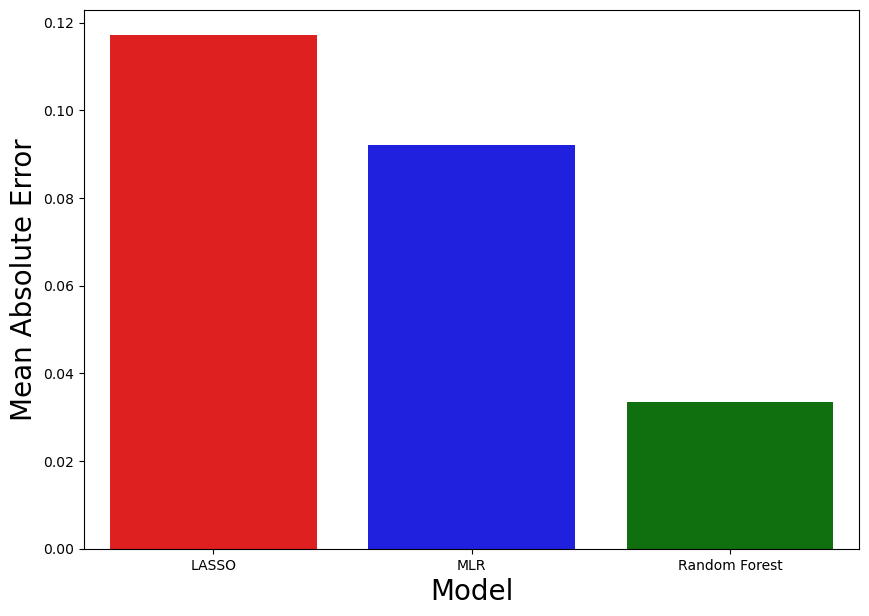

In [84]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))

model_colors = ['red', 'blue', 'green']

sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe, palette=model_colors)

axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

In [85]:
#BASED ON THE MAE, IT IS CONCLUDED THAT THE RANDOM FOREST MODEL IS 
#THE BEST REGRESSION MODEL FOR PREDICTING THE PLANE PRICE BASED ON 
#14 PREDICTOR VARIABLES

In [86]:
#calculating the training accuracy score
print(model_rf.score(x_train, y_train))
print(model_mlr.score(x_train, y_train))
print(model_lm.score(x_train, y_train))

0.7794343040835918
0.38834169902267446
0.0


In [87]:
from sklearn.metrics import r2_score
Rsquared = r2_score(y_test,y_pred_RF)
print('R2 score for RF is ',Rsquared)
Rsquared = r2_score(y_test,y_pred_MLR)
print('R2 score for MLR is ',Rsquared)
Rsquared = r2_score(y_test,y_pred_LSO)
print('R2 score for Lasso is ',Rsquared)

R2 score for RF is  0.6476748272236756
R2 score for MLR is  0.44412883338366405
R2 score for Lasso is  -0.0002882940101205378


In [88]:
import pickle
filename = 'Plane_Price' #name of the pickle file
pickle.dump(model_rf, open(filename, 'wb')) #opens the file in write binary mode
#this pickle file object is passed on to pickle.dump()

In [89]:
import pickle
with open('Plane_Price','wb') as f:
    pickle.dump(model_rf,f)

In [90]:
loaded_model = pickle.load(open(filename, 'rb')) #retrive the model
loaded_model.predict(x_test)

array([ 0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.11302713,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.17044535,  0.23204774,  0.23204774, -0.01436181,  0.23204774,
       -0.90578514,  0.23204774,  0.23204774,  0.23204774,  0.23204774,
        0.23204774,  0.23204774,  0.23204774,  0.21972726,  0.23204774,
        0.23204774,  0.23204774,  0.18276583, -0.38137285,  0.23204774,
        0.23204774,  0.07188153,  0.23204774,  0.23204774,  0.23

In [91]:
loaded_model = pickle.load(open(filename, 'rb')) # retrieve the model
y_pred_scaled = loaded_model.predict(x_test)  # Get scaled predictions

original_price_mean = pd.read_csv('Plane_Price.csv')['Price'].mean()
original_price_std = pd.read_csv('Plane_Price.csv')['Price'].std()

# Unscale the predictions to get actual prices
predicted__Price = y_pred_scaled * original_price_std + original_price_mean

In [92]:
predicted__Price

array([2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2477817.46054378,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2599067.49526579, 2599067.49526579, 2599067.49526579,
       2536311.20922966, 2599067.49526579, 2599067.49526579,
       2348042.35112127,

In [93]:
# Generate predictions for the entire training set
predicted__Price = model_mlr.predict(x_train_actual)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual price': y_train_actual,
    'Predicted price': predicted__Price
})

# Display the DataFrame and save to CSV
display(results_df)
results_df.to_csv('results.csv', index=False)


,Actual price,Predicted price
0,0.232048,0.194875
1,0.232048,0.222526
2,0.232048,0.256727
3,0.232048,0.253796
4,0.232048,0.285784
...,...,...
508,0.232048,0.414057
509,0.232048,0.386257
511,0.232048,0.216578
513,0.232048,0.237417
